# Bloco 3

<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 2. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. Neste bloco, as discentes estão aplicando modelos de treinamento de Machine Learning e analisando o metódo que melhor se adequa a target e os features estabelecidos. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michel </p>
<hr>

### **COLETA DE DADOS**

In [20]:
# Importando bibliotecas
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [19]:
# Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [18]:
# Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [6]:
meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

In [7]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

In [8]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-12.314859,-43.234066,2022-03-02 01:05:48,9.0,2.7,1.0
1,-20.227880,-46.415940,2022-03-02 01:28:00,8.0,0.0,0.3
2,-20.229250,-46.426820,2022-03-02 01:28:00,8.0,0.0,0.3
3,-20.238930,-46.425510,2022-03-02 01:28:00,8.0,0.0,0.4
4,-20.237550,-46.414600,2022-03-02 01:28:00,8.0,0.0,0.4
...,...,...,...,...,...,...
265136,-6.360000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0
265137,-6.360000,-45.690000,2022-07-29 23:54:47,46.0,0.0,1.0
265138,-6.400000,-44.140000,2022-07-29 23:54:47,34.0,0.0,1.0
265139,-6.350000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0


<hr>

### PCA

In [21]:
# Estabelecendo as features
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "risco_fogo", "lat", "lon"]
# Normalizando os dados
X = meses.reindex(FEATURES, axis=1)
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

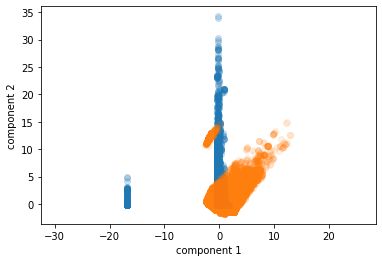

In [22]:
# Graficando o PCA
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

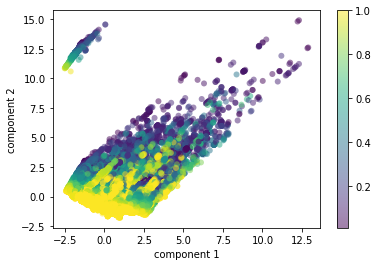

In [23]:
# Colorindo os pontos de acordo com o risco de fogo, para entender se a PCA agrupou os dados de alguma maneira
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=meses["risco_fogo"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

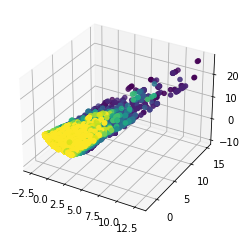

In [24]:
# Plotando gráfico 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=meses["risco_fogo"].values)

In [15]:
# Matriz de loadings, para investigar o que cada componente principal levou em conta em relação as features originais
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
numero_dias_sem_chuva,0.006656,-0.605773,0.566622,-0.544293,-0.125217
precipitacao,0.319718,0.377805,0.771173,0.336204,0.217492
risco_fogo,-0.321753,-0.605883,0.058650,0.664743,0.289929
lat,-0.627497,0.267263,0.100865,-0.346458,0.636090
lon,-0.632818,0.227548,0.265741,0.169696,-0.669588


array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

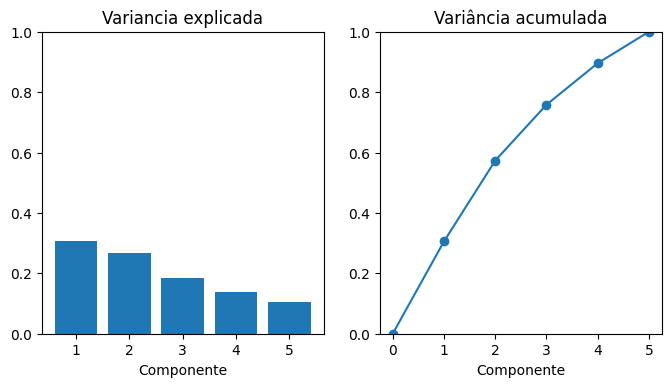

In [16]:
# graficando a variância explicada e acumulada
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)

<hr>